In [2]:
library(gcookbook)
library(ggplot2)
library(plyr)

# 2. Quickly Exploring Data
## 2.1  Creating a Scatter Plot    

In [ ]:
# 方法一: plot
plot(mtcars$wt, mtcars$mpg)
# 方法二: ggplot2::qplot 
#library(ggplot2)
ggplot2::qplot(mtcars$wt, mtcars$mpg) # 或者 qplot(wt, mpg, data=mtcars) 此方法要求两个变量在同一个数据集中
# 方法三： ggplot2::ggplot()+geom_point()
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()

## 2.2 creating a line graph

In [ ]:
plot(pressure$temperature,pressure$pressure,type="l")
# 也可以使用 ggplot2
ggplot2::qplot(pressure$temperature, pressure$pressure, geom="line")
# 或者
ggplot2::ggplot(pressure,aes(x=temperature,y=pressure))+geom_line()
# ===
# 如果想在同一幅图中加入更多的线图或者点图，则可以直接添加 lines() 和 points() 
plot(pressure$temperature,pressure$pressure,type="l")
points(pressure$temperature,pressure$pressure)
lines(pressure$temperature,pressure$pressure/2,col='red')
points(pressure$temperature,pressure$pressure/2,col='red')
# 相应 ggplot2 版本
ggplot2::qplot(temperature,pressure,data=pressure,geom=c('line','point'))
# equivalent to
ggplot2::ggplot(pressure,aes(x=temperature,y=pressure))+geom_line()+geom_point()

## 2.3 creating a Bar graph

In [ ]:
#options(warn=-1)
# 不同数据集使用不同方法，BOD$demand 类似一个归总数据，而mtcars$cyl需要先归总
barplot(BOD$demand,names.arg=BOD$Time) #names.arg 指定横轴标记
barplot(table(mtcars$cyl)) 
# 使用 ggplot2
# 报错，因为涉及stat参数，故此处不推荐使用qplot: qplot(factor(BOD$Time),BOD$demand,geom="bar",stat="identity") # convert the x variable to a factor, so that it is treated as discrete
qplot(mtcars$cyl) # 更好使用 qplot(factor(mtcars$cyl))
# 或者使用
# 报错，此处不推荐使用qplot: qplot(Time,demand,data=BOD,geom="bar") # 报错
ggplot(BOD,aes(x=Time,y=demand))+geom_bar(stat="identity")

## 2.4 creating a histogram

In [ ]:
hist(mtcars$mpg)
hist(mtcars$mpg,breaks=10)
# ggplot2
qplot(mtcars$mpg)# 等价于 qplot(mtcars$mpg,binwidth=1)
qplot(mpg,data=mtcars,binwidth=4) # 等价于 ggplot(mtcars,aes(x=mpg))+geom_histogram(binwidth=4)

# 2.5 creating a box plot

In [ ]:
plot(ToothGrowth$supp,ToothGrowth$len) # 数据的原因（a factor of x values and a vector of y values），使得简单实用plot就可以画出box图
boxplot(len~supp,data=ToothGrowth)
# ggplot2
qplot(ToothGrowth$supp,ToothGrowth$len,geom="boxplot")
qplot(supp,len,data=ToothGrowth,geom="boxplot")# 等价于 ggplot(ToothGrowth,aes(x=supp,y=len))+geom_boxplot()

In [ ]:
# it's also possible to make box plots for multiple variables,by combining the variables with "interaction()"
qplot(interaction(ToothGrowth$supp,ToothGrowth$dose),ToothGrowth$len,geom="boxplot")
qplot(interaction(supp,dose),len,data=ToothGrowth,geom="boxplot")
ggplot(ToothGrowth,aes(x=interaction(supp,dose),y=len))+geom_boxplot()

# 2.6 plotting a function curve

In [ ]:
# use "curve()" and pass it an expression with the variable x
curve(x^3-5*x,from=-4,to=4)
# 或者是自定义的function
myfun<-function(x){
    1/(exp(-x+10))
}
curve(myfun(x),from=0,to=20)
curve(1-myfun(x),add=TRUE,col="red") # add a line
# ggplot2
ggplot(data.frame(x=c(0,20)),aes(x=x))+stat_function(fun=myfun,geom="line") # 注意，似乎此处的data.frame必不可少


# 3. Bar Graphs
* 为什么 bar 图似乎一定需要 stat 这个参数
## 3.1 making a basic bar graph

In [ ]:
library(gcookbook) # for the dataset
library(ggplot2)
ggplot(pg_mean,aes(x=group,y=weight))+
    geom_bar(stat="identity")
# 当x轴变量是连续的时候，可能会导致图形的不连续，因为有些x值上没有数据；此时要使用 factor() 将其转化。
ggplot(BOD,aes(x=Time,y=demand))+
    geom_bar(stat="identity")

ggplot(BOD,aes(x=factor(Time),y=demand))+
    geom_bar(stat="identity")

# ggplot函数中控制填充颜色和bar的边框颜色
ggplot(pg_mean,aes(x=group,y=weight))+
    geom_bar(stat="identity",fill="lightblue",color="black")

## 3.2 grouping bar together
* 使用参数 position="dodge"

In [ ]:
# 疑问：stat和position参数各指什么？？？；
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat="identity",position="dodge") # use position="dodge" to tell the bars to "dodge" each other horizontally, if you don't, you'll end up with a stacked bar plot
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat="identity",position='stack') #equivalent to: geom_bar(stat="identity")

# 设置其他
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat='identity',position='dodge',colour='black')+ # 注意，不要遗漏 stat参数，感觉上它和position参数是一起的；此处的 color 是边框颜色
    scale_fill_brewer(palette='Pastel1') # scale_fill_brewer填充bar的颜色；后面的 scale_fill_manual也是如此

## 3.3 making a bar graph of counts

In [ ]:
ggplot(diamonds,aes(x=cut))+
    geom_bar()
ggplot(diamonds,aes(x=carat))+
    geom_bar()
ggplot(diamonds,aes(x=carat))+
    geom_histogram()

## 3.4 using colours in a bar graph

In [ ]:
upc<-subset(uspopchange,rank(Change)>40)
ggplot(upc,aes(x=Abb,y=Change,fill=Region))+
    geom_bar(stat='identity') # 太单调了
# 通过 scale_fill_manual 设置填充bar的颜色
ggplot(upc,aes(x=reorder(Abb,Change),y=Change,fill=Region))+ # reorder的用法？？？
    geom_bar(stat='identity',colour='black')+
    scale_fill_manual(values=c('#669933','#FFCC66'))+
    xlab('State')

## 3.5 coloring negative and positive bars differently

In [ ]:
csub<-subset(climate,Source=="Berkeley"&Year>=1900)
csub$pos<-csub$Anomaly10y>=0
ggplot(csub,aes(x=Year,y=Anomaly10y,fill=pos))+
    geom_bar(stat='identity',position="identity")
# we cna change the colors with "scale_fill_manual()" and remove the legend with "guide=FALSE"
ggplot(csub,aes(x=Year,y=Anomaly10y,fill=pos))+
    geom_bar(stat='identity',position='identity',colour='black',size=.25)+
    scale_fill_manual(values=c('#CCEEFF','#FFDDDD'),guide=FALSE)

## 3.6 adjusting bar width and spacing 

In [ ]:
# 调整width
ggplot(pg_mean,aes(x=group,y=weight))+
    geom_bar(stat='identity') 
ggplot(pg_mean,aes(x=group,y=weight))+
    geom_bar(stat='identity',width=0.5) # width默认为0.9

# for grouped bars,add some space between bars
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat='identity',width=0.5,position='dodge') # geom_bar(position='dodge') 等价于 geom_bar(width=0.9,position=position_dodge())
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat='identity',width=0.5,position=position_dodge(0.7))

In [ ]:
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat='identity')

## 3.7 making a stacked bar graph

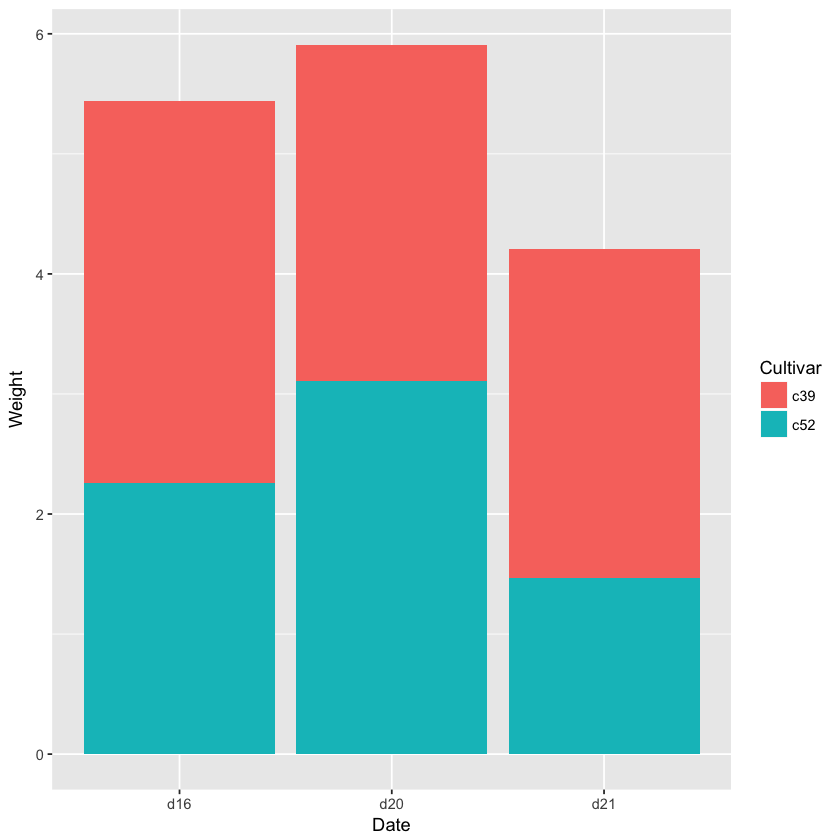

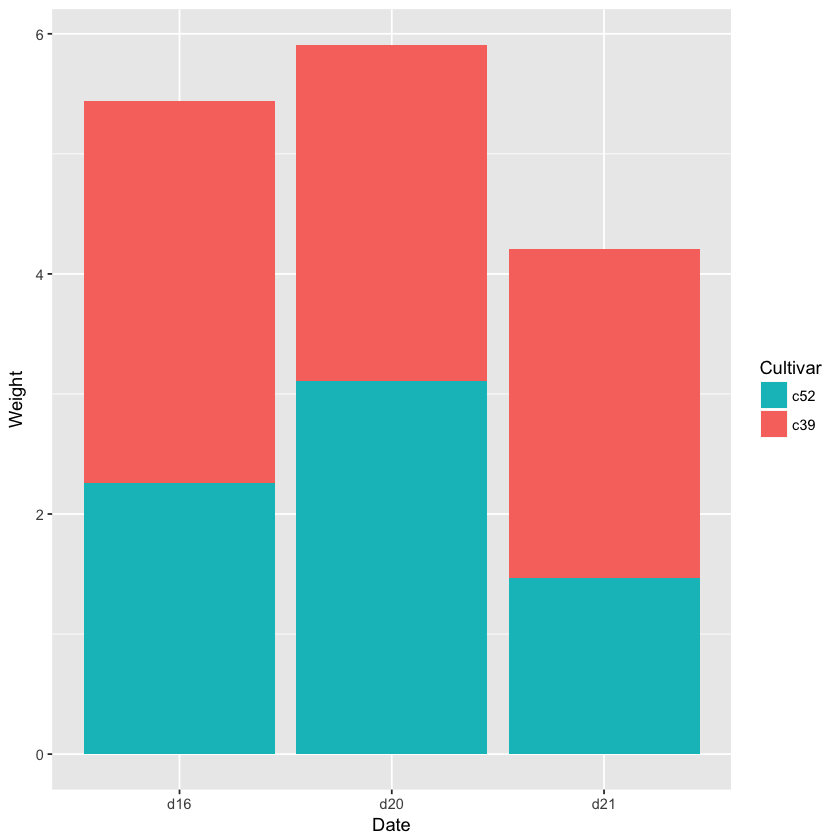

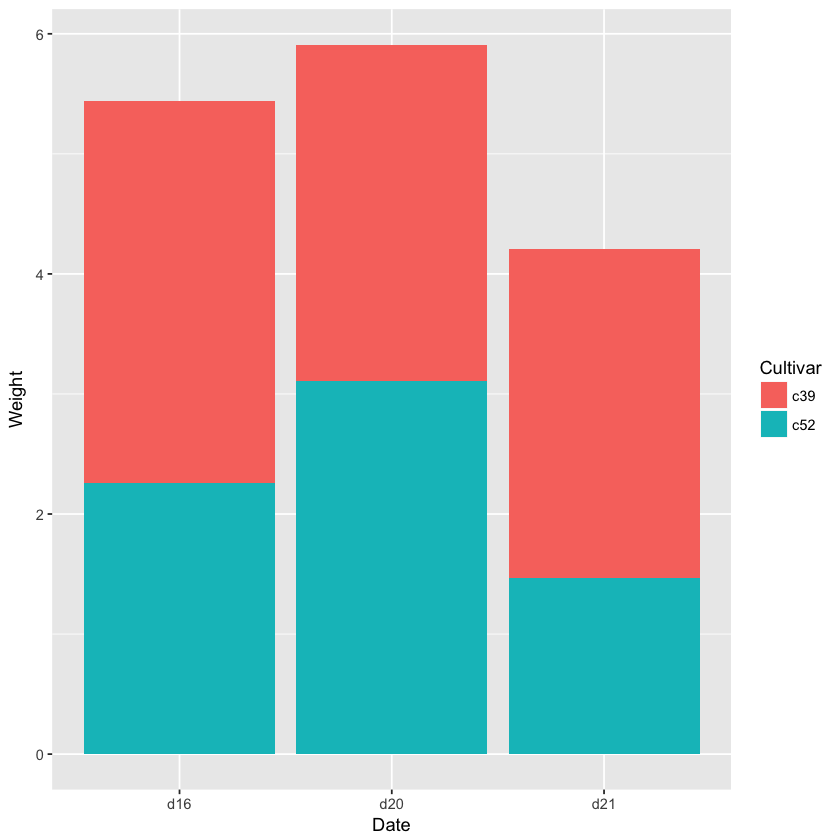

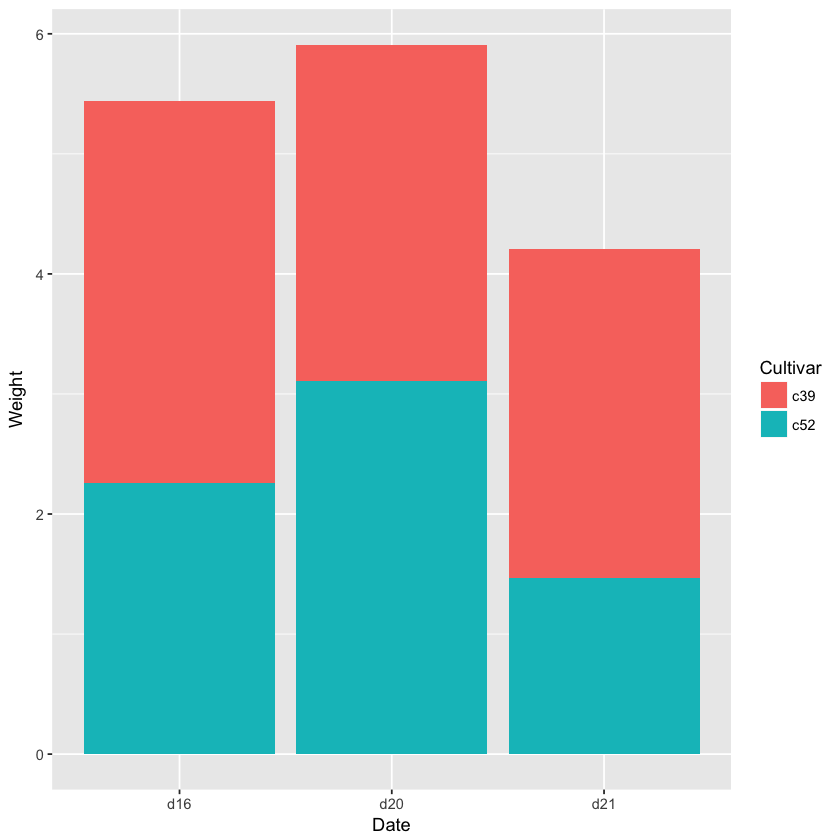

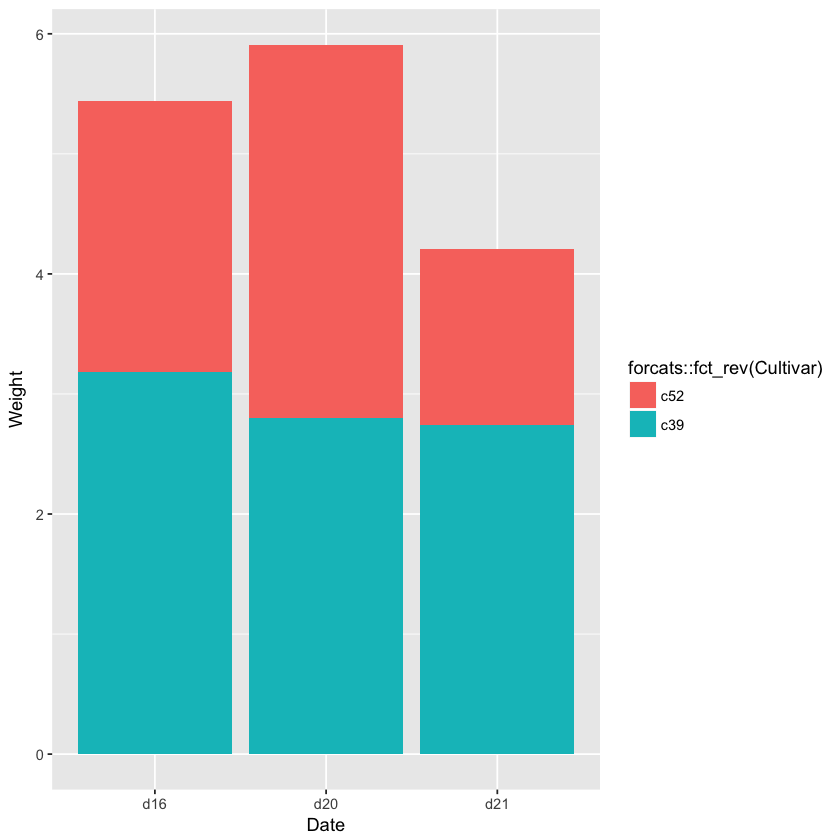

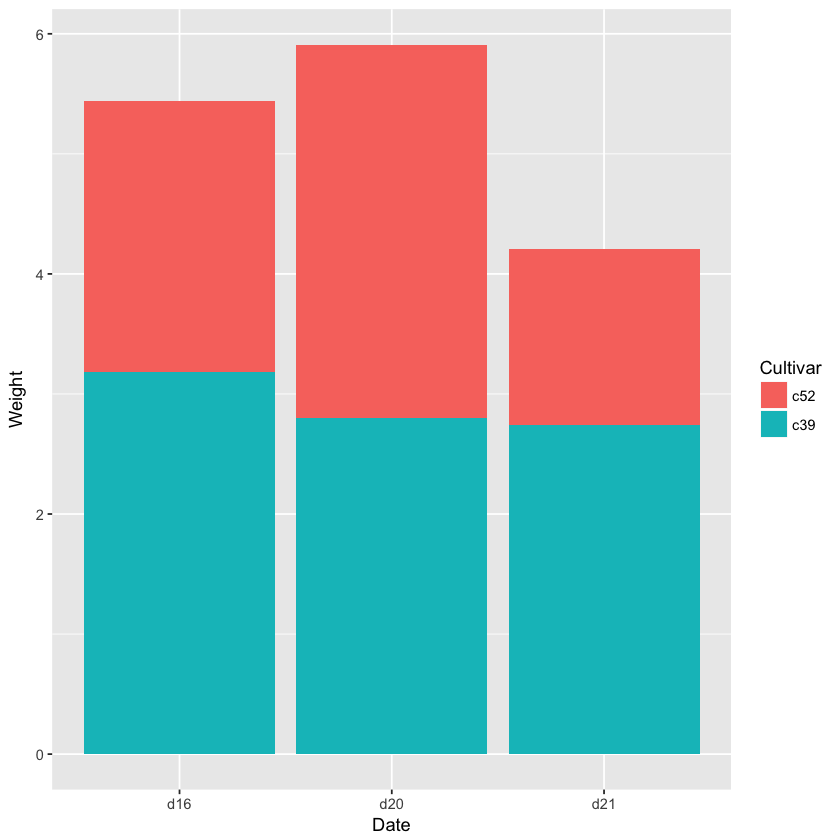

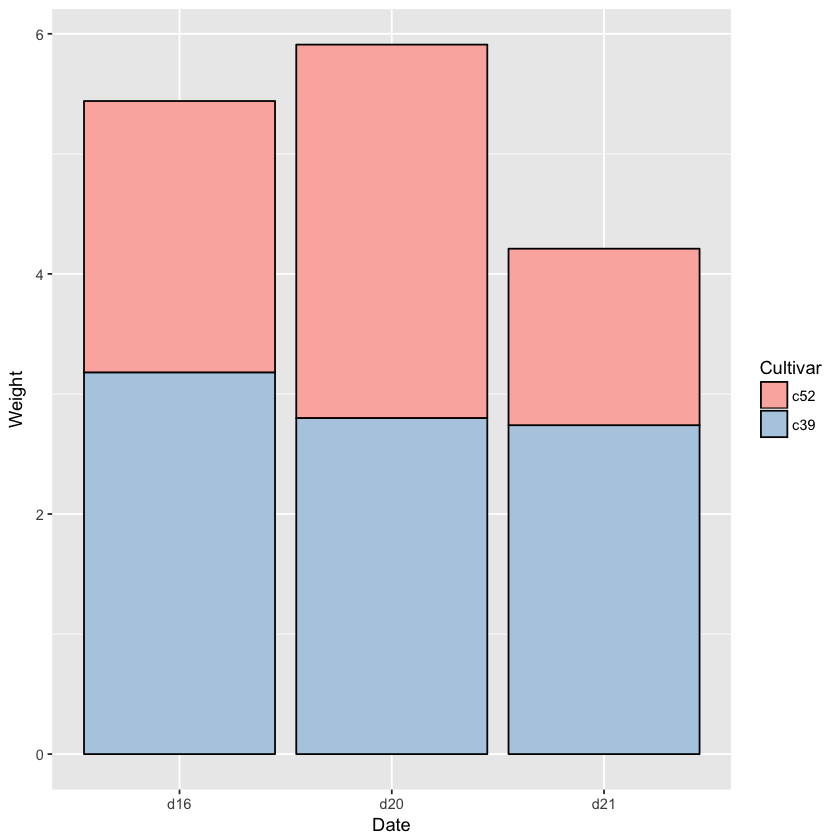

In [3]:
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat='identity') # 等价于 geom_bar(stat='identity',position='stack') ，即默认为 position='stack'
# 调换顺序，但是下面三种都是错的
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat='identity')+
    guides(fill=guide_legend(reverse=TRUE)) # 错的，只能调换legend的顺序，但是相应数据并没有发生变化
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar,order=order(Cultivar,decreasing=TRUE)))+
    geom_bar(stat='identity') 
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar,order=desc(Cultivar)))+ # with 2.1.0 version: "The order aesthetic is officially deprecated. It never really worked, and was poorly documented."
    geom_bar(stat='identity') 
# 正确写法(使用forcats::fct_rev)
cabbage_exp_reversed<-cabbage_exp[nrow(cabbage_exp):1,]
ggplot(cabbage_exp_reversed,aes(x=Date,y=Weight,fill=forcats::fct_rev(Cultivar)))+
    geom_bar(stat='identity')
# 或者使用修改factor的levels  
cabbage_exp_rev<-cabbage_exp
cabbage_exp_rev$Cultivar<-factor(cabbage_exp_rev$Cultivar)
cabbage_exp_rev$Cultivar<-factor(cabbage_exp_rev$Cultivar,levels=rev(levels(cabbage_exp_rev$Cultivar)))
ggplot(cabbage_exp_rev,aes(x=Date,y=Weight,fill=Cultivar,label=Cultivar))+
    geom_bar(stat='identity')
#
cabbage_exp_rev<-cabbage_exp
cabbage_exp_rev$Cultivar<-factor(cabbage_exp_rev$Cultivar)
cabbage_exp_rev$Cultivar<-factor(cabbage_exp_rev$Cultivar,levels=rev(levels(cabbage_exp_rev$Cultivar)))
ggplot(cabbage_exp_rev,aes(x=Date,y=Weight,fill=Cultivar,label=Cultivar))+
    geom_bar(stat='identity',colour='black')+
    scale_fill_brewer(palette='Pastel1')

## 3.8 making a proportional stacked bar graph(also called a 100% stacked bar graph)

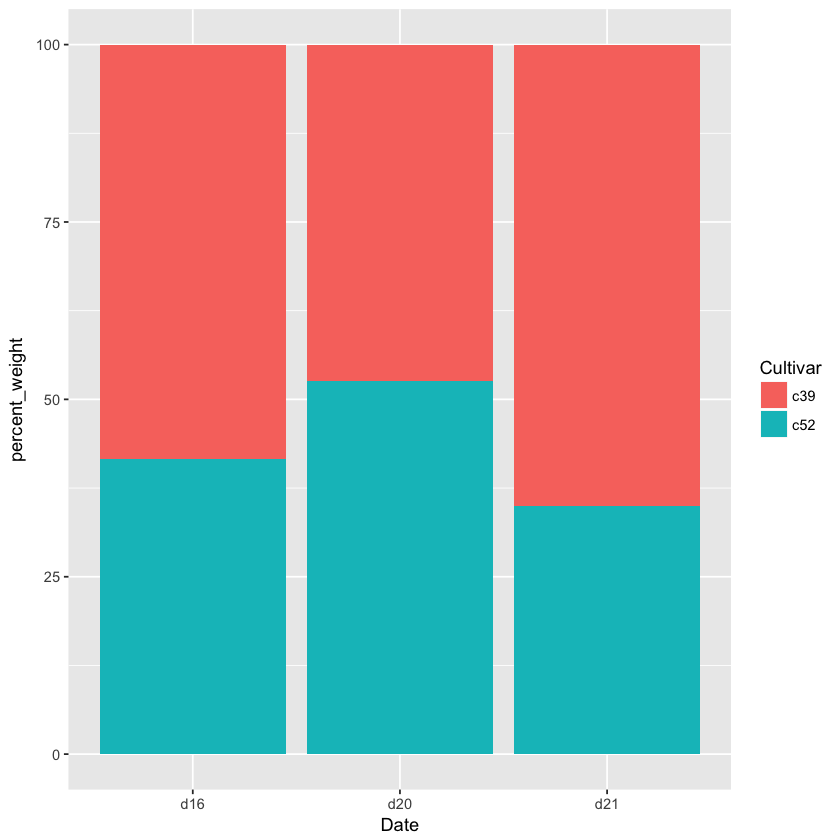

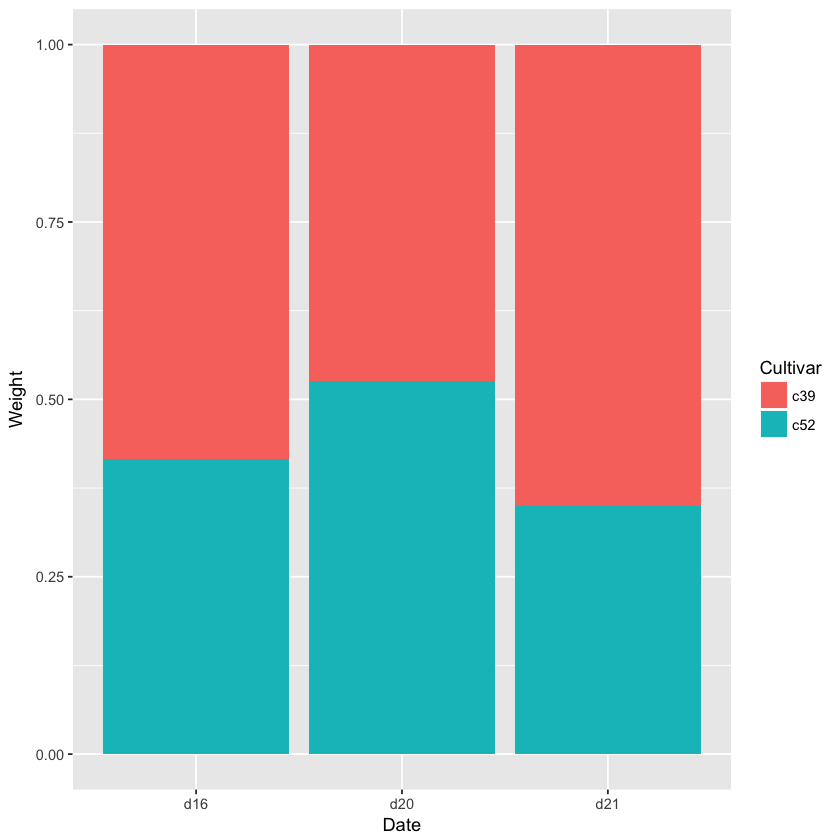

In [7]:
# by using "ddply()" from the plyr package, with "transform()"。【此方法主要是通过数据影响】
ce<-ddply(cabbage_exp,'Date',transform,percent_weight=Weight/sum(Weight)*100)
ggplot(ce,aes(x=Date,y=percent_weight,fill=Cultivar))+
    geom_bar(stat='identity')
# 也可以使用 position='fill'
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar,label=Cultivar))+
    geom_bar(stat='identity',position='fill')

## 3.9 adding labels to a bar graph

mapping: label = Weight 
geom_text: parse = FALSE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

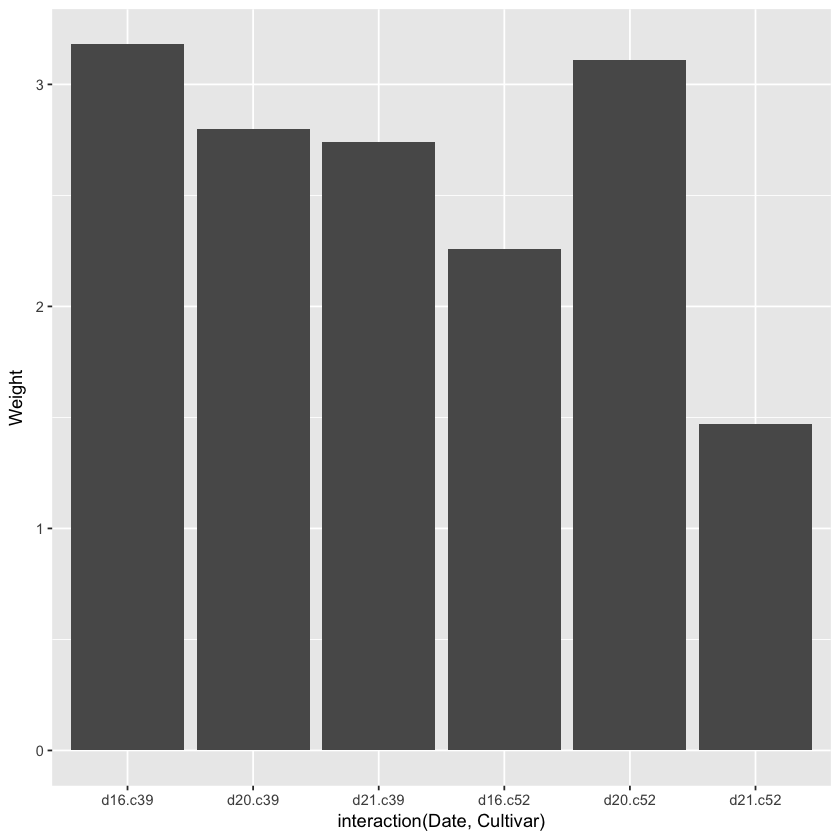

mapping: label = Weight 
geom_text: parse = FALSE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

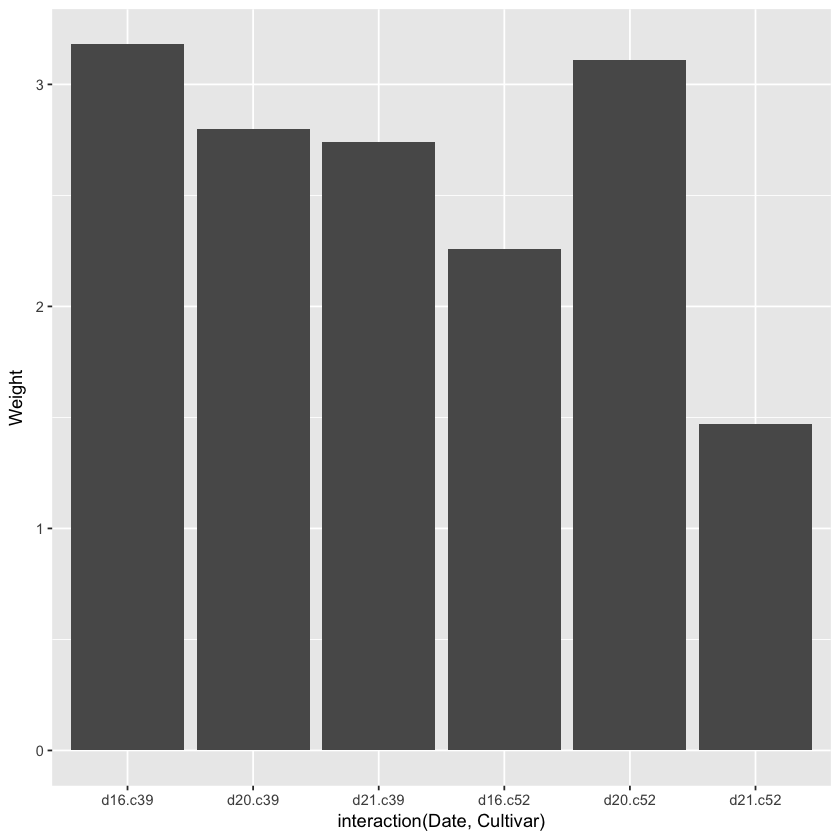

In [11]:
# 使用 geom_text() 【有问题，没有显示label】
ggplot(cabbage_exp,aes(x=interaction(Date,Cultivar),y=Weight))+
    geom_bar(stat='identity')
    geom_text(aes(label=Weight),vjust=1.5)
ggplot(cabbage_exp,aes(x=interaction(Date,Cultivar),y=Weight))+
    geom_bar(stat='identity')
    geom_text(aes(label=Weight),vjust=-1.5)